# Financial News Sentiment Analysis 
## Problem Statement
The task of this project is to build a model for Financial news sentiment prediction. Specifically this sentiment is calculated only using the new headlines. FinancialPhraseBank [Link for data](https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news) 

## Importing Modules
In the cell below I have listed and imported all the external module that I would be using for processing and analyzing the data

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from string import punctuation 
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
import torch 
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn

## Data preprocessing

### Data loading


In [328]:
data = pd.read_csv('all-data.csv', names=['Sentiment', 'Review'], encoding='latin-1')
data

,Sentiment,Review
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


### Data Cleaning 
We do the following operations:<br/>
1.) Convert to lower<br/>
2.) Remove punctuation<br/>
3.) Remove neutral marked reviews

In [329]:
# Converting all letters to lower case
data['Review'] = data['Review'].str.lower()

# Removing all punctuation marks 
punctuation = set(punctuation)
def PuncRem( ss):
    return ''.join([i for i in ss if i not in punctuation])

data['Review'] = data['Review'].apply(PuncRem)
data = data[data['Sentiment'] != 'neutral']
# 

## Data Processing
### Tokenization 

In [330]:
words = ' '.join(data['Review']).split(' ')
word_count = Counter(words)
del word_count['']
total_words = len(words)
sorted_words = word_count.most_common(total_words)

In [331]:
sorted_words

[('the', 2346),
 ('in', 1442),
 ('of', 1291),
 ('to', 1281),
 ('and', 876),
 ('eur', 774),
 ('a', 754),
 ('from', 566),
 ('for', 526),
 ('mn', 465),
 ('s', 435),
 ('profit', 347),
 ('company', 340),
 ('its', 337),
 ('said', 307),
 ('net', 300),
 ('finnish', 297),
 ('sales', 290),
 ('by', 289),
 ('has', 268),
 ('will', 255),
 ('million', 248),
 ('on', 245),
 ('with', 236),
 ('period', 227),
 ('operating', 219),
 ('it', 218),
 ('year', 213),
 ('is', 203),
 ('m', 203),
 ('mln', 196),
 ('that', 194),
 ('2009', 193),
 ('at', 189),
 ('quarter', 186),
 ('as', 181),
 ('was', 175),
 ('2008', 166),
 ('oyj', 148),
 ('2010', 147),
 ('loss', 141),
 ('be', 140),
 ('compared', 139),
 ('2007', 138),
 ('group', 133),
 ('an', 131),
 ('first', 130),
 ('up', 118),
 ('finland', 118),
 ('corresponding', 111),
 ('euro', 103),
 ('increased', 102),
 ('rose', 98),
 ('share', 98),
 ('are', 97),
 ('have', 93),
 ('today', 93),
 ('2006', 91),
 ('new', 88),
 ('market', 86),
 ('which', 84),
 ('down', 83),
 ('percent'

In [332]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
vocab_to_int

{'the': 1,
 'in': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'eur': 6,
 'a': 7,
 'from': 8,
 'for': 9,
 'mn': 10,
 's': 11,
 'profit': 12,
 'company': 13,
 'its': 14,
 'said': 15,
 'net': 16,
 'finnish': 17,
 'sales': 18,
 'by': 19,
 'has': 20,
 'will': 21,
 'million': 22,
 'on': 23,
 'with': 24,
 'period': 25,
 'operating': 26,
 'it': 27,
 'year': 28,
 'is': 29,
 'm': 30,
 'mln': 31,
 'that': 32,
 '2009': 33,
 'at': 34,
 'quarter': 35,
 'as': 36,
 'was': 37,
 '2008': 38,
 'oyj': 39,
 '2010': 40,
 'loss': 41,
 'be': 42,
 'compared': 43,
 '2007': 44,
 'group': 45,
 'an': 46,
 'first': 47,
 'up': 48,
 'finland': 49,
 'corresponding': 50,
 'euro': 51,
 'increased': 52,
 'rose': 53,
 'share': 54,
 'are': 55,
 'have': 56,
 'today': 57,
 '2006': 58,
 'new': 59,
 'market': 60,
 'which': 61,
 'down': 62,
 'percent': 63,
 'also': 64,
 'hel': 65,
 'increase': 66,
 'this': 67,
 'been': 68,
 'business': 69,
 'per': 70,
 '2005': 71,
 'services': 72,
 'contract': 73,
 'decreased': 74,
 'operations': 75,
 'o

In [333]:
reviews_int = []

for review in data['Review']:
    reviews_int.append([vocab_to_int[w] for w in review.split()])

reviews_int

[[1,
  302,
  729,
  151,
  13,
  284,
  20,
  530,
  166,
  1781,
  3,
  190,
  8,
  14,
  730,
  358,
  2704,
  4,
  79,
  303,
  1,
  13,
  1129,
  1,
  2705,
  3,
  14,
  388,
  451,
  1,
  825,
  2706,
  224],
 [24,
  1,
  59,
  110,
  121,
  1,
  13,
  142,
  66,
  14,
  215,
  4,
  1380,
  1,
  125,
  66,
  2,
  199,
  5,
  142,
  316,
  1,
  260,
  3,
  731,
  732,
  5,
  967,
  66,
  1,
  110,
  531],
 [107,
  4,
  1,
  13,
  11,
  2707,
  304,
  9,
  1,
  261,
  2708,
  317,
  968,
  7,
  285,
  16,
  18,
  98,
  2,
  1,
  1381,
  3,
  132,
  216,
  24,
  46,
  26,
  12,
  286,
  3,
  143,
  132,
  3,
  16,
  18],
 [592,
  3,
  532,
  11,
  98,
  532,
  29,
  2709,
  2710,
  14,
  98,
  304,
  19,
  1782,
  1783,
  23,
  1784,
  89,
  1382,
  2711,
  1383,
  969,
  2712,
  2713],
 [9,
  1,
  86,
  35,
  3,
  40,
  452,
  11,
  16,
  18,
  970,
  4,
  2714,
  8,
  2715,
  9,
  1,
  87,
  25,
  7,
  28,
  79,
  122,
  27,
  1785,
  4,
  7,
  2716,
  123,
  12,
  8,
  7,
  123,


### Analysing article length
In this section we are analyzing article length to decide on the fixed length that will be used for inputs and then we are removing outliers. 

No handles with labels found to put in legend.
<ipython-input-334-26121abff597>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


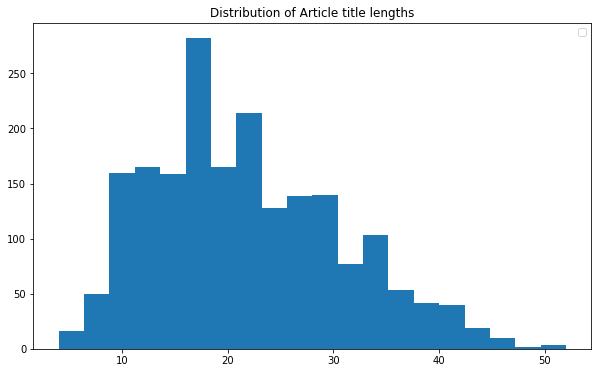

In [334]:
list_len_reviews = list(map(len, reviews_int))
fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.hist(list_len_reviews, bins=20)
ax.set_title('Distribution of Article title lengths')
ax.legend()

fig.show()

In [335]:
max(list_len_reviews)

52

In [336]:
min(list_len_reviews)

4

### Final dataset
In this section we will be creating the final datasets that will be used by our Neural Network as input and outputs.

In [337]:
'''
Structure of Data 
size of review ( will use this later for elimination)
60 columns of review_ints
Sentiment value "negative", "positive" and "neutral"
'''

# Creating empty Df to be filled later with actual values
cols = ["Rev_"+str(i) for i in range(1,61)]
cols.append("Length")
cols.append("Sentiment")
empty_array = np.zeros([len(list_len_reviews), 62])
review_data = pd.DataFrame(empty_array, columns=cols)

# filling values in df

for ind, review_int in enumerate(reviews_int):
    for i in range(len(review_int)-1,-1,-1):
        review_data.iloc[ind, 59-i] = review_int[i]
        
    # size
    review_data.iloc[ind, 60] = list_len_reviews[ind]
    
    # sentiment
    rev = data.iloc[ind, 0]
#     if rev == "neutral":
#         review_data.iloc[ind, 61] = 0.5
    if rev == "positive":
        review_data.iloc[ind, 61] = 1
    else:
        review_data.iloc[ind, 61] = 0
        
review_data

,Rev_1,Rev_2,Rev_3,Rev_4,Rev_5,Rev_6,Rev_7,Rev_8,Rev_9,Rev_10,...,Rev_53,Rev_54,Rev_55,Rev_56,Rev_57,Rev_58,Rev_59,Rev_60,Length,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,530.0,20.0,284.0,13.0,151.0,729.0,302.0,1.0,33.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,142.0,13.0,1.0,121.0,110.0,59.0,1.0,24.0,32.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,304.0,2707.0,11.0,13.0,1.0,4.0,107.0,35.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2709.0,29.0,532.0,98.0,11.0,532.0,3.0,592.0,24.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,452.0,40.0,3.0,35.0,86.0,1.0,9.0,36.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2681.0,102.0,355.0,2.0,133.0,105.0,809.0,77.0,37.0,0.0
1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,700.0,2.0,158.0,880.0,232.0,54.0,2083.0,700.0,24.0,0.0
1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,10.0,1799.0,6.0,4.0,102.0,12.0,26.0,21.0,0.0
1965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,74.0,1003.0,124.0,1.0,3.0,18.0,16.0,42.0,0.0


In [338]:
'''
Removing outliers
In our case we will be removing very short reviews
Since the title of any news article can be short 
we are setting a threshold of 5 as the min required len for our article to be valid
'''

review_data = review_data[review_data['Length'] >= 5]
review_data

,Rev_1,Rev_2,Rev_3,Rev_4,Rev_5,Rev_6,Rev_7,Rev_8,Rev_9,Rev_10,...,Rev_53,Rev_54,Rev_55,Rev_56,Rev_57,Rev_58,Rev_59,Rev_60,Length,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,530.0,20.0,284.0,13.0,151.0,729.0,302.0,1.0,33.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,142.0,13.0,1.0,121.0,110.0,59.0,1.0,24.0,32.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,304.0,2707.0,11.0,13.0,1.0,4.0,107.0,35.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2709.0,29.0,532.0,98.0,11.0,532.0,3.0,592.0,24.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,452.0,40.0,3.0,35.0,86.0,1.0,9.0,36.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2681.0,102.0,355.0,2.0,133.0,105.0,809.0,77.0,37.0,0.0
1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,700.0,2.0,158.0,880.0,232.0,54.0,2083.0,700.0,24.0,0.0
1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,10.0,1799.0,6.0,4.0,102.0,12.0,26.0,21.0,0.0
1965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,74.0,1003.0,124.0,1.0,3.0,18.0,16.0,42.0,0.0


### Train Test Spliting 
Here we are spliting our training and testing DataSets.

In [339]:
'''
Creating Training and testing datasets

'''
review_data.drop(['Length'], axis=1, inplace=True)
X = review_data.loc[:, review_data.columns != "Sentiment"]
Y = review_data.loc[:,"Sentiment"]

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state=42)

X_train = X_train[:1550]
Y_train = Y_train[:1550]
Y_test = Y_test[:350]
X_test = X_test[:350]

C:\Users\adwai\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [340]:
'''
Creating Loaders for our datasets

'''

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(X_train.to_numpy()), torch.from_numpy(Y_train.to_numpy()))
test_data = TensorDataset(torch.from_numpy(X_test.to_numpy()), torch.from_numpy(Y_test.to_numpy()))

# batch size 
batch_size = 50

# create data loaders
train_loader = DataLoader(train_data, shuffle = True, batch_size = batch_size)
test_loader = DataLoader(test_data, shuffle = True, batch_size = batch_size)

In [341]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 60])
Sample input: 
 tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.5000e+02, 1.0000e+03,
         1.7000e+01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.2760e+03, 4.9300e+02,
         1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.7000e+01, 7.3000e+01,
         1.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.0000e+00, 9.8000e+01,
         1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 5.8700e+02, 1.0000e+00,
         6.8100e+02],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.5000e+02, 1.8700e+02,
         1.6000e+01]], dtype=torch.float64)

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.],
       dtype=torch.float64)


## LSTM construction

In this section we will be building the architecture for the LSTM network that will then be used for prediction. 

In [ ]:
class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

### Model initialization

In [343]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(6207, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


### Model Training

In [344]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
train_on_gpu = False

# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()


### Model Testing

In [345]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.606
Test accuracy: 0.843


## Conclusion

### Basic Analysis
The current bench mark for Financial Phrase bank data is at 86% accuracy using FinBERT model. But having said that the prediction done in FinBERT is for multiclass classification ( Which includes <i>"Neutral"</i> classification as well). While we have done a binary style prediction only trying to guage the sentiment of the news article between 0 to 1. <br/> 1 being Positive <br/> 0 being Negative. 